In [10]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

# Spam Data
***

# Load the spam data set.

In [3]:
df = pd.read_csv('spam.csv')

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

df.columns = ['label','text']

df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Create and explore bigrams for the spam data. 

In [13]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [14]:
spam_bigrams = pd.Series(nltk.ngrams(spam_words, 2)).value_counts()

top_10_spam_bigrams = spam_bigrams.head(10)

top_10_spam_bigrams

(please, call)         44
(customer, service)    27
(1000, cash)           25
(po, box)              24
(guaranteed, call)     23
(prize, guaranteed)    22
(chance, win)          19
(selected, receive)    19
(send, stop)           19
(every, week)          19
dtype: int64

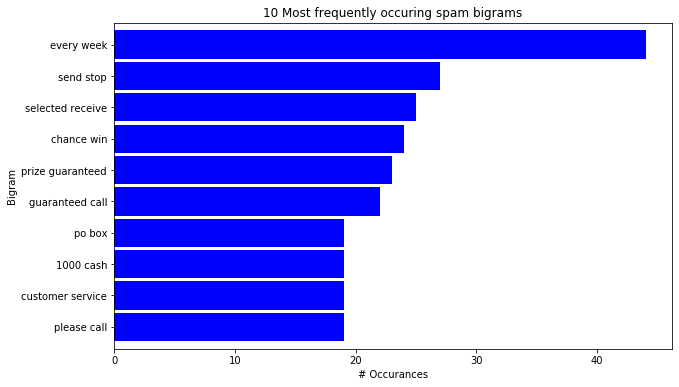

In [15]:
top_10_spam_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring spam bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [5]:
ham_bigrams = pd.Series(nltk.ngrams(ham_words, 2)).value_counts()

top_10_ham_bigrams = ham_bigrams.head(10)

top_10_ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       33
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        26
(ok, lor)          22
dtype: int64

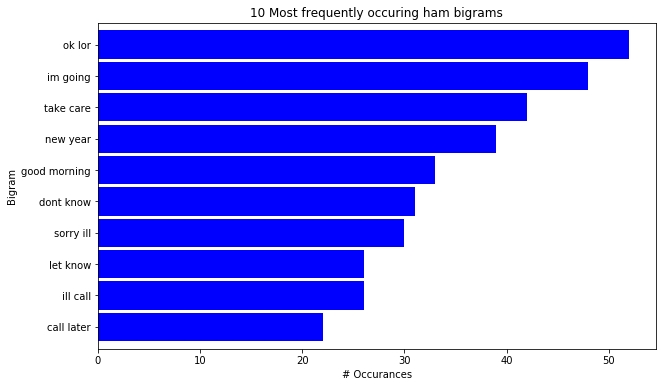

In [6]:
top_10_ham_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# Visualize them with a word cloud. How do they compare with the ham bigrams?

(-0.5, 799.5, 399.5, -0.5)

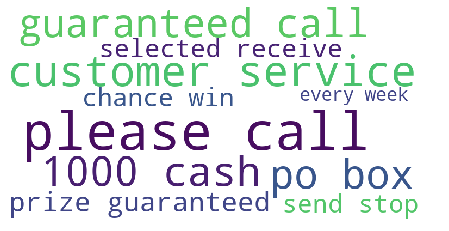

In [12]:
data = {k[0] + ' ' + k[1]: v for k, v in top_10_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

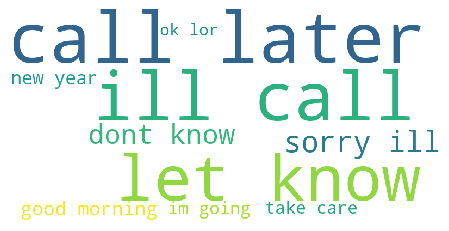

In [16]:
data = {k[0] + ' ' + k[1]: v for k, v in top_10_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

## Is there any overlap in the bigrams for the spam data and the ham data?

In [37]:
matching_bigrams = []

for x in spam_bigrams.index:
    if x in ham_bigrams.index:
        matching_bigrams.append(x)

print(f'There are {len(matching_bigrams)} bigrams that overlap between the spam and ham data.')

There are 187 bigrams that overlap between the spam and ham data.


## Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [40]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words, 3)).value_counts()

top_10_spam_trigrams = spam_trigrams.head(10)

top_10_spam_trigrams

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(2003, account, statement)    13
(private, 2003, account)      13
(show, 800, unredeemed)       12
(camcorder, reply, call)      12
(guaranteed, 1000, cash)      12
(anytime, network, min)       11
dtype: int64

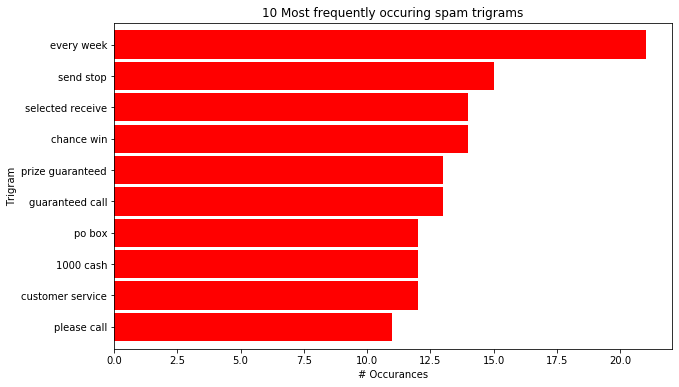

In [42]:
top_10_spam_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_spam_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [43]:
ham_trigrams = pd.Series(nltk.ngrams(ham_words, 3)).value_counts()

top_10_ham_trigrams = ham_trigrams.head(10)

top_10_ham_trigrams

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(pick, phone, right)    12
(cant, pick, phone)     12
(phone, right, pls)     12
(right, pls, send)      12
(hi, hi, hi)            11
(x, x, x)                8
dtype: int64

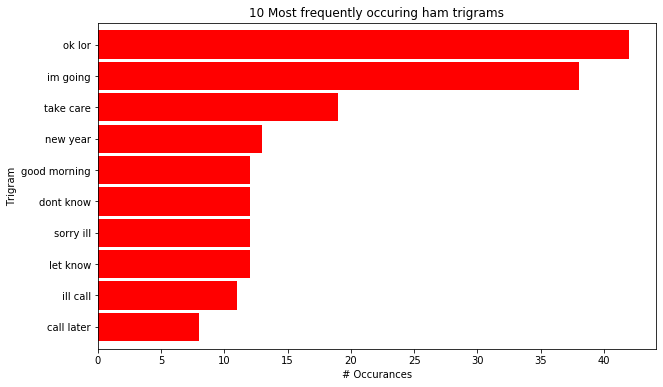

In [44]:
top_10_ham_trigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_10_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

## Explore the blog articles using the techniques discussed in the exploration lesson.

## Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [9]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)

labels.columns = ['n', 'percent']

labels

,n,percent
ham,4825,0.865937
spam,747,0.134063
